In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image

# Create a watermark on a photo

Text(0.5, 1.0, 'Logo, (2436, 2623, 4), 60')

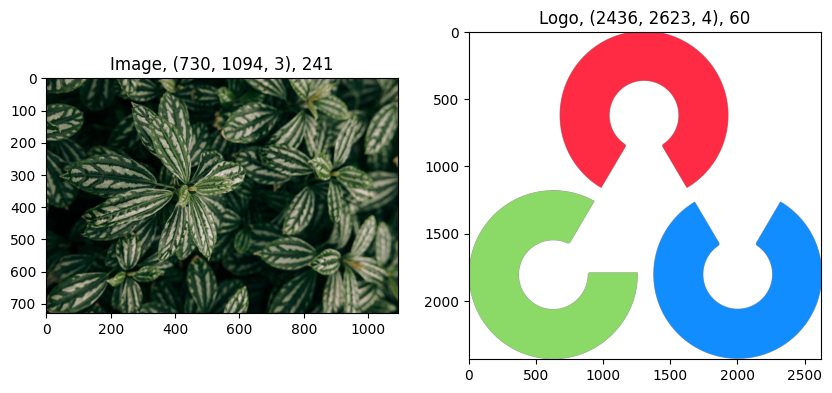

In [2]:
# Load in Image and Watermark
img = cv2.imread('../data/leaves.jpg',-1)
logo = cv2.imread('../data/opencv_logo.png',-1)

# Print images and info
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img[:,:,[2,1,0]]); ax[0].set_title(f"Image, {img.shape}, {len(np.unique(img))}")
ax[1].imshow(logo[:,:,[2,1,0,3]]); ax[1].set_title(f"Logo, {logo.shape}, {len(np.unique(logo))}")

Resized Logo, (146, 157, 4), 207


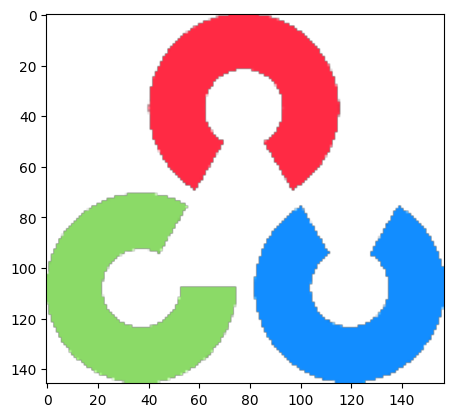

In [3]:
# Resize logo to fit in image 150x150
# logo = cv2.resize(logo, (250,250), interpolation=cv2.INTER_LANCZOS4)
logo = cv2.resize(logo, None, fx = 0.06, fy = 0.06, interpolation = cv2.INTER_LANCZOS4)
print(f"Resized Logo, {logo.shape}, {len(np.unique(logo))}")
plt.imshow(logo[:,:,[2,1,0,3]]);

In [4]:
img_h, img_w, _ = img.shape
logo_h, logo_w, _ = logo.shape
print(f"Image: {img_h}x{img_w}, Logo: {logo_h}x{logo_w}")


Image: 730x1094, Logo: 146x157


Text(0.5, 1.0, 'Logo_Alpha, (146, 157), 93')

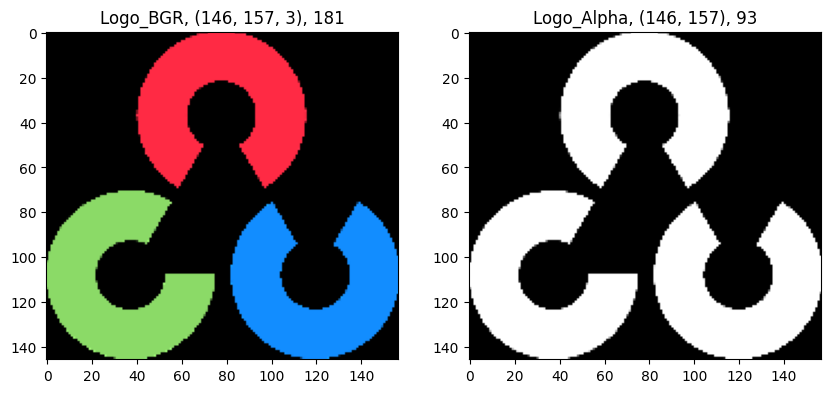

In [14]:
# Seperate out alpha channel
logo_alpha = logo[:,:,3]
logo_bgr = logo[:,:,0:3]

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(logo_bgr[:,:,[2,1,0]]); ax[0].set_title(f"Logo_BGR, {logo_bgr.shape}, {len(np.unique(logo_bgr))}")
ax[1].imshow(logo_alpha,cmap="gray"); ax[1].set_title(f"Logo_Alpha, {logo_alpha.shape}, {len(np.unique(logo_alpha))}")

Text(0.5, 1.0, 'Image ROI, (146, 157, 3), 181')

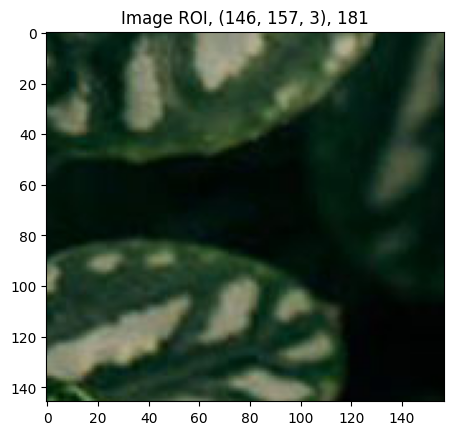

In [12]:
# Create ROI
roi = img[0:logo.shape[0], 0:logo.shape[1]]
roi.shape # ROI is same size as logo
plt.imshow(roi[:,:,[2,1,0]]); plt.title(f"Image ROI, {roi.shape}, {len(np.unique(roi))}")

Text(0.5, 1.0, 'img, \nUniqe:241')

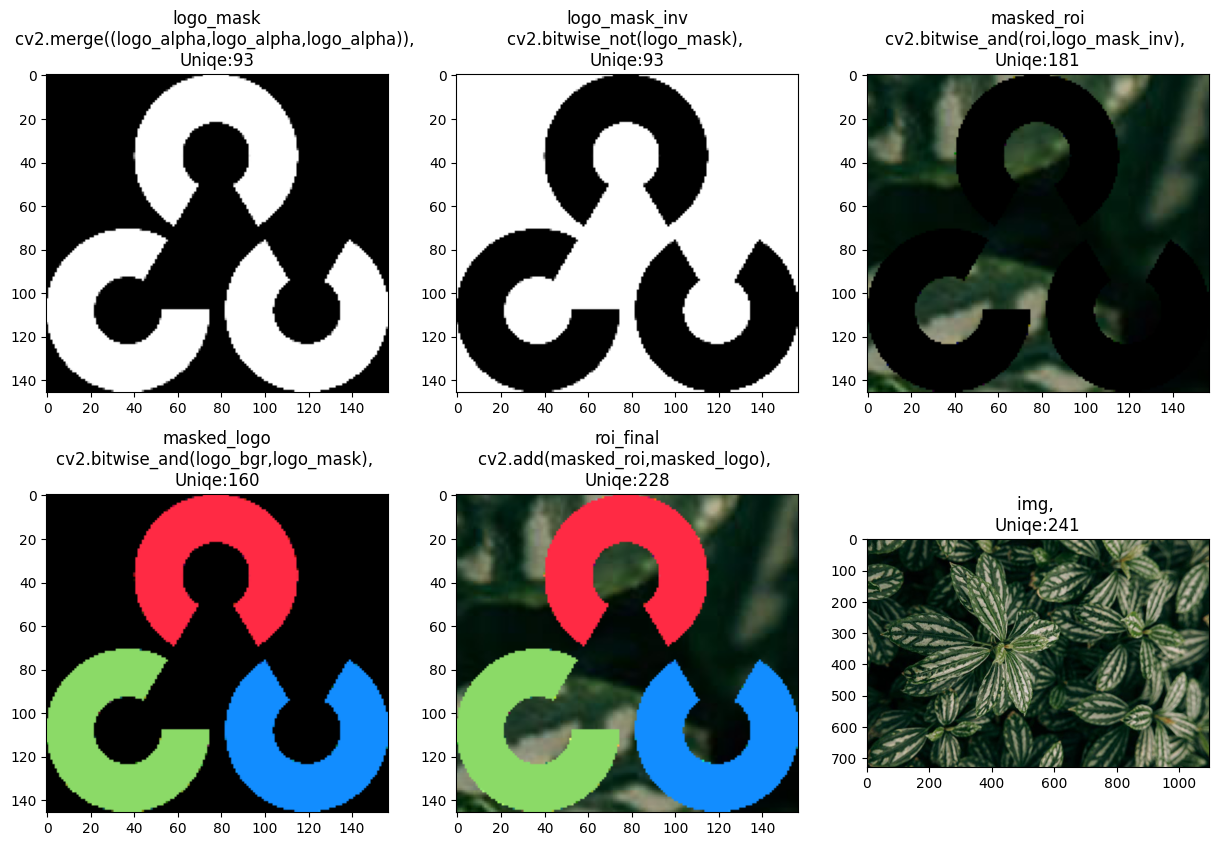

In [19]:
logo_mask = cv2.merge((logo_alpha,logo_alpha,logo_alpha))

logo_mask_inv = cv2.bitwise_not(logo_mask)

masked_roi = cv2.bitwise_and(roi,logo_mask_inv)

masked_logo = cv2.bitwise_and(logo_bgr,logo_mask)   

roi_final = cv2.add(masked_roi,masked_logo)

fig, ax = plt.subplots(2,3, figsize=(15,10))
ax[0,0].imshow(logo_mask,cmap="gray"); ax[0,0].set_title(f"logo_mask\ncv2.merge((logo_alpha,logo_alpha,logo_alpha)), \nUniqe:{len(np.unique(logo_mask))}")
ax[0,1].imshow(logo_mask_inv,cmap="gray"); ax[0,1].set_title(f"logo_mask_inv\ncv2.bitwise_not(logo_mask), \nUniqe:{len(np.unique(logo_mask_inv))}")
ax[0,2].imshow(masked_roi[:,:,[2,1,0]]); ax[0,2].set_title(f"masked_roi\ncv2.bitwise_and(roi,logo_mask_inv), \nUniqe:{len(np.unique(masked_roi))}")
ax[1,0].imshow(masked_logo[:,:,[2,1,0]]); ax[1,0].set_title(f"masked_logo\ncv2.bitwise_and(logo_bgr,logo_mask), \nUniqe:{len(np.unique(masked_logo))}")
ax[1,1].imshow(roi_final[:,:,[2,1,0]]); ax[1,1].set_title(f"roi_final\ncv2.add(masked_roi,masked_logo), \nUniqe:{len(np.unique(roi_final))}")
ax[1,2].imshow(img[:,:,[2,1,0]]); ax[1,2].set_title(f"img, \nUniqe:{len(np.unique(img))}")



Text(0.5, 1.0, 'Final Image, (730, 1094, 3), 256')

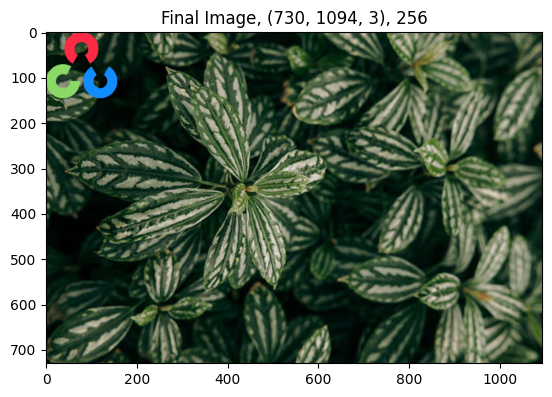

In [20]:
# Replace ROI with new image
img[0:logo.shape[0], 0:logo.shape[1]] = roi_final

plt.imshow(img[:,:,[2,1,0]]); plt.title(f"Final Image, {img.shape}, {len(np.unique(img))}")

**Create semi-transparent watermark**

Text(0.5, 1.0, 'Final Image, (730, 1094, 3), 256')

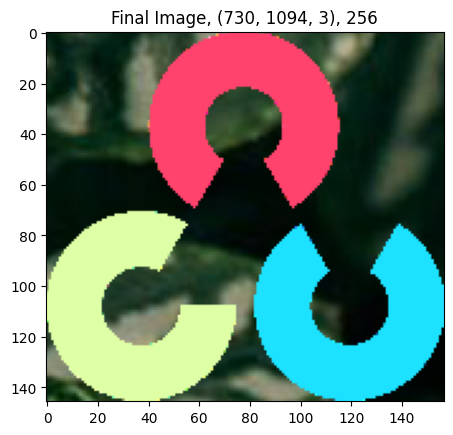

In [27]:
logo_bgr = logo[:,:,0:3]
roi = img[0:logo.shape[0], 0:logo.shape[1]]

roi_final = cv2.addWeighted(roi, 1, logo_bgr, 0.6, 0)
plt.imshow(roi_final[:,:,[2,1,0]]); plt.title(f"Final Image, {img.shape}, {len(np.unique(img))}")